In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
data=pd.read_csv('covid 19 symtomps.csv')
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [6]:
data.shape

(316800, 27)

In [9]:
data.sample(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
24159,0,1,1,0,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,China
176498,0,0,1,1,1,0,1,1,1,0,...,0,1,1,0,0,0,1,0,0,Spain
49277,0,1,1,1,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,Italy
104381,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,Republic of Korean
309961,0,0,0,1,1,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0,Other
245282,1,1,1,0,0,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,UAE
233990,0,0,0,1,1,0,0,0,1,1,...,0,1,1,0,0,0,1,0,0,UAE
121977,0,0,0,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,Republic of Korean
31196,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,China
232845,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,UAE


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [11]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.drop(["Country"],axis=1,inplace=True)
data.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
249858,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
155296,0,1,0,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
114649,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
166004,0,0,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
176851,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [13]:
data.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [14]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

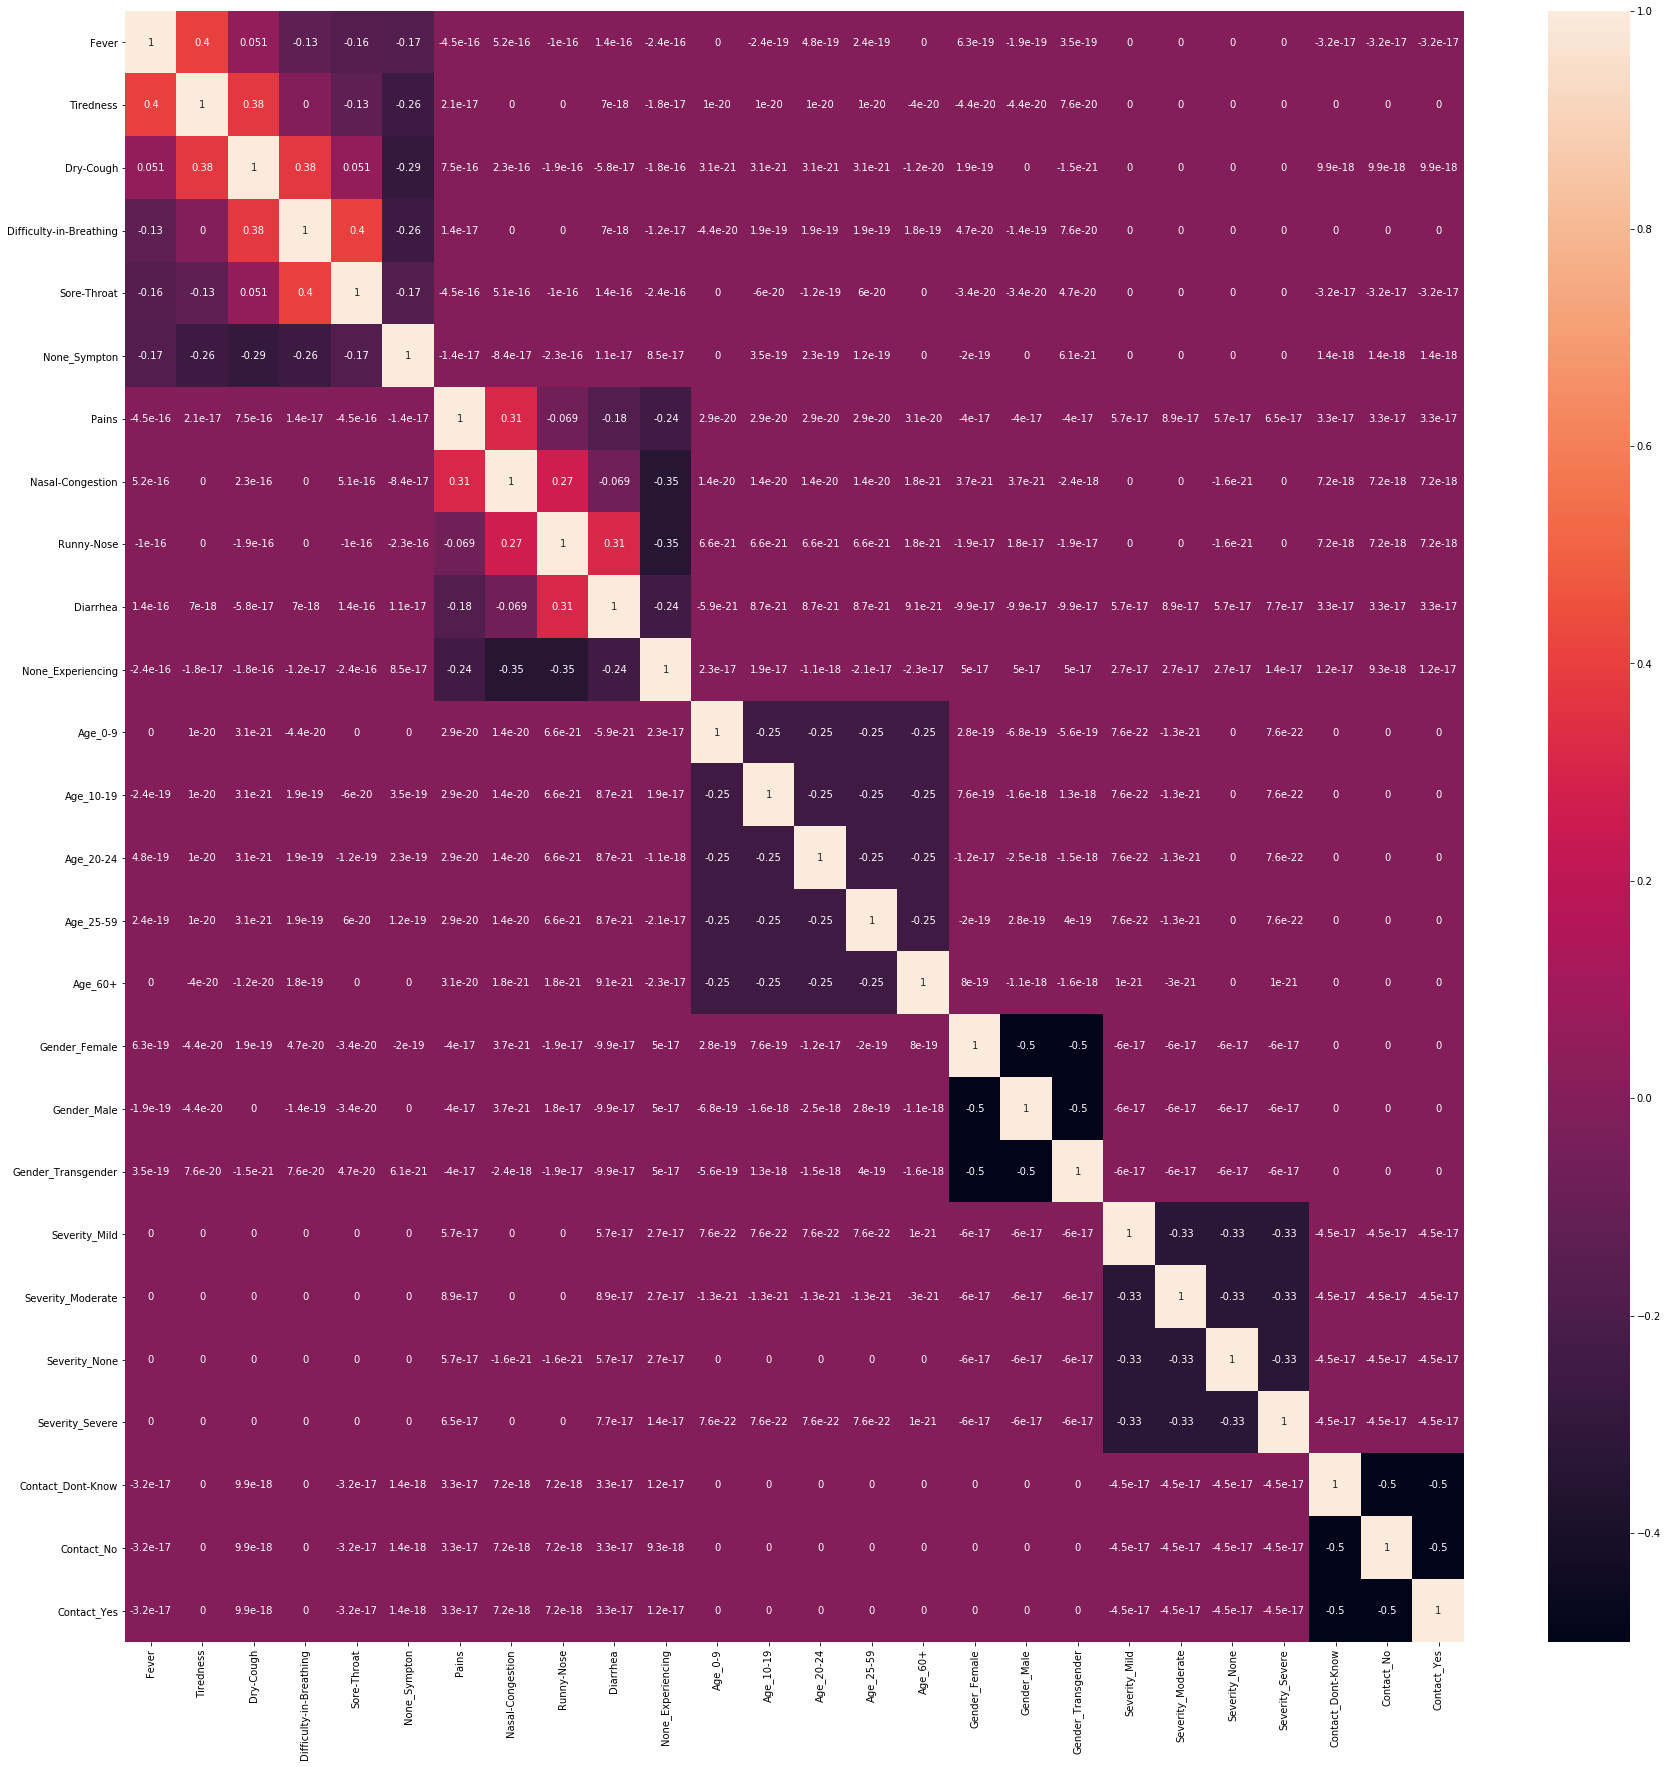

In [17]:
import seaborn as sns

#To plot a correlation matrix between features.
f,ax= plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [18]:
#To scale the values along columns.
scaler= StandardScaler()
data_scaled=scaler.fit_transform(data)

In [19]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    data_means=KMeans(n_clusters=i)
    data_means.fit(data_scaled)
    scores.append(data_means.inertia_)

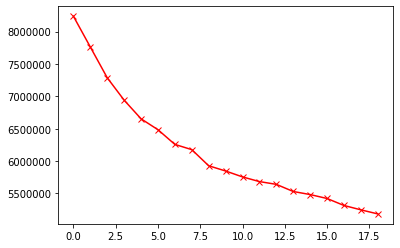

In [20]:
#Plotting the values obtained to get the optimal K-value.
plt.plot(scores,"-rx")

In [21]:
#Applying K-means algorithm with the obtained K value.
data_means=KMeans(n_clusters=7)
data_means.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
#Returns an array with cluster labels to which it belongs.
labels=data_means.labels_

In [23]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
data_m=pd.DataFrame(data_means.cluster_centers_,columns=data.columns)
data_m

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.598772,0.601533,0.117299,-0.409962,-0.492347,-0.258199,5.647745e-02,1.357065e-01,5.875951e-02,7.240699e-04,...,-3.251066e-02,-3.251066e-02,6.502131e-02,-2.337134e-20,-7.790445e-21,-7.399929e-17,-7.790445e-21,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.306182e-16,-3.228829e-16,4.305852e-16,5.381568e-17,...,-4.713721e-15,7.879315e-15,7.880117e-15,-1.331707e-20,-4.439023e-21,-7.400599e-17,-4.439023e-21,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.306182e-16,-3.228829e-16,4.305852e-16,5.381568e-17,...,-4.713721e-15,7.879315e-15,7.880117e-15,-1.331707e-20,-4.439023e-21,-7.400599e-17,-4.439023e-21,7.401487e-17,7.401487e-17,7.401487e-17
3,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.305808e-16,-3.227034e-16,4.304806e-16,5.379325e-17,...,2.224717e-15,-2.150104e-16,-2.146277e-16,-3.574582e-20,-1.191527e-20,-7.399104e-17,-1.191527e-20,7.401487e-17,7.401487e-17,7.401487e-17
4,-0.572782,-0.529915,0.029074,0.598291,0.644235,-0.258199,-6.299408e-02,-1.513649e-01,-6.553945e-02,-8.076164e-04,...,3.626189e-02,3.626189e-02,-7.252377e-02,-2.582541e-20,-8.608470e-21,-7.399765e-17,-8.608470e-21,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.306182e-16,-3.228829e-16,4.305852e-16,5.381568e-17,...,-4.713721e-15,7.879315e-15,7.880117e-15,-1.331707e-20,-4.439023e-21,-7.400599e-17,-4.439023e-21,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.306182e-16,-3.228829e-16,4.305852e-16,5.381568e-17,...,-4.713721e-15,7.879315e-15,7.880117e-15,-1.331707e-20,-4.439023e-21,-7.400599e-17,-4.439023e-21,7.401487e-17,7.401487e-17,7.401487e-17


In [25]:
######CLUSTER 4 IS NOT AFFECTED BY CORONA

#Concatenating the cluster labels.
data_cluster=pd.concat([data,pd.DataFrame({"Cluster":labels})],axis=1)
data_cluster.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
151621,0,0,0,1,1,0,0,0,1,1,...,0,1,1,0,0,0,0,1,0,5
283073,1,1,1,1,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
291145,0,0,0,1,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,0,6
118527,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,5
85014,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,1,0,0,1,5


In [26]:
#Implementing pca with 3 components i.e 3d plot            PCA=PRINCIPLE COMPONENT ANALYSIS
data_pca=PCA(n_components=3)
principal_comp=data_pca.fit_transform(data_scaled)

In [27]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp.head()

,pca1,pca2,pca3
0,-2.210284,-1.835574,-0.384036
1,-2.192827,-1.823113,-0.289648
2,-2.074802,-1.945426,-0.079170
3,-2.243004,-1.701402,-0.188894
4,-2.225546,-1.688940,-0.094506


In [28]:
principal_comp=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp.sample(5)

,pca1,pca2,pca3,Cluster
109614,1.172359,-1.395643,-1.274222,1
233075,-1.646750,-0.185033,-1.239434,2
311246,-1.508263,3.334336,-1.260358,4
281120,-1.612183,-0.259705,1.323838,0
1782,0.773433,-0.765797,-1.122242,6


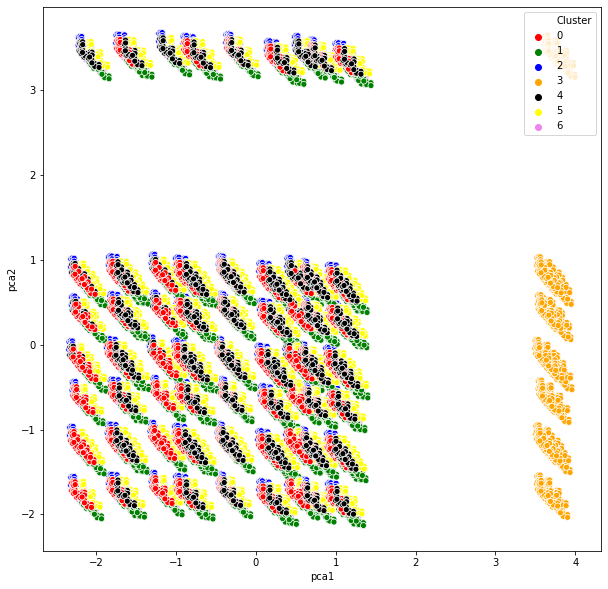

In [33]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

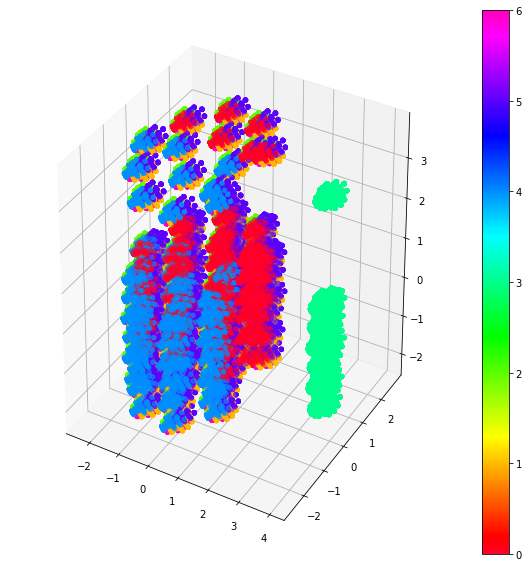

In [32]:
#Plotting the 3d-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp['pca1'],ys=principal_comp['pca3'],zs=principal_comp['pca2'],c=principal_comp['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()